In [121]:
import numpy as np
from scipy.special import logit, expit 
import matplotlib.pyplot as plt
# Importing sigmoid and inverse of sigmoid

# Seeing what our data looks like

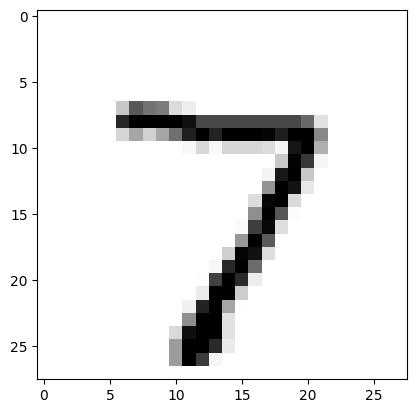

In [141]:
first_picture = test_pictures[0].split(",")
first_picture = np.array(first_picture[1:]).astype(float).reshape(28,28)
plt.imshow(first_picture, cmap="Greys", interpolation=None)

# Class Definition

In [122]:
class Network:

    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate

        self.activation_function = lambda x : expit(x)
        self.inverse_activation_function = lambda x : logit(x)

        # weight range should have mean 0, std deviation of 1 / sqrt(# of output nodes) 

        self.wih = np.random.normal(loc=0.0, scale=pow(self.hidden_nodes, -.5), size=(hidden_nodes, input_nodes))

        self.who = np.random.normal(loc=0.0, scale=pow(self.output_nodes, -.5), size=(output_nodes, hidden_nodes))


    def train(self, input_list, target_list):
        # raise dimension to 2 so you can transpose into column vector
        input_vector = np.array(input_list, ndmin=2).T   


        hidden_inputs = np.dot(self.wih, input_vector) # dot to get the hidden input vector 
        hidden_outputs = self.activation_function(hidden_inputs) # apply sigmoid

        final_inputs = np.dot(self.who, hidden_outputs) # dot to get the final input vector 
        final_outputs = self.activation_function(final_inputs) # apply sigmoid

        targets = np.array(target_list, ndmin=2).T # this should be of length 10

        errors = targets - final_outputs
        # a
        self.who += np.dot(self.learning_rate * errors * final_outputs * (1-final_outputs), hidden_outputs.T) # this is 3x4

        error_hidden = np.dot(self.who.T, errors) # this is a 4x1

        self.wih += np.dot(self.learning_rate * error_hidden * hidden_outputs * (1-hidden_outputs), input_vector.T) # this is 4x3

        
    def query(self, input_list):
        # basically just return forward prop output
        input_vector = np.array(input_list, ndmin=2).T   

        hidden_inputs = np.dot(self.wih, input_vector) # dot to get the hidden input vector 
        hidden_outputs = self.activation_function(hidden_inputs) # apply sigmoid

        final_inputs = np.dot(self.who, hidden_outputs) # dot to get the final input vector 
        final_outputs = self.activation_function(final_inputs) # apply sigmoid
        return final_outputs



In [123]:
def train_network(n : Network, train_pictures):
    for pic in train_pictures:
            all_vals = pic.split(",")
            label = int(all_vals[0])

            input_list = np.array(all_vals[1:]).astype(float) # scale the input list 
            input_list = (input_list / 255 * .99) + .01 # scale this between .01 to 1
            
            target_list = [.01 for i in range(10)]
            target_list[label] = .99
            n.train(input_list, target_list)
        

In [124]:
def test_network(n : Network, test_pictures):
    scores = []
    for pic in test_pictures:
        first_test_pic = pic.split(",")
        label = int(first_test_pic[0])
        input_list = np.array(first_test_pic[1:]).astype(float)
        input_list = (input_list / 255 * .99) + .01 # scale this between .01 to 1

        outputs = n.query(input_list)
        guess = np.argmax(outputs)
        if guess==label:
            scores.append(1)
        else:
            scores.append(0)
    return scores

In [125]:
train_data = open("mnist_data/mnist_training_full.csv")
train_pictures = train_data.readlines()
train_data.close()
test_data = open("mnist_data/mnist_testing_full.csv")
test_pictures = test_data.readlines()
test_data.close()

# Let's see how epoch size affects accuracy

In [132]:
epochs = [i for i in range(1, 10)] # testing performance wrt. epochs
final_scores = []
for epoch in epochs:
    input_nodes = 784
    hidden_nodes  = 532
    output_nodes = 10
    learning_rate = .2
    n = Network(input_nodes, hidden_nodes, output_nodes, learning_rate)
    for i in range(epoch):
        train_network(n, train_pictures)

    scores = test_network(n, test_pictures)
    final_score = np.sum(scores) / len(scores) * 100
    final_scores.append(final_score)

In [133]:
results = final_scores
results

[np.float64(95.72),
 np.float64(96.5),
 np.float64(96.38),
 np.float64(96.96000000000001),
 np.float64(96.50999999999999),
 np.float64(96.5),
 np.float64(96.48),
 np.float64(96.48),
 np.float64(96.65)]

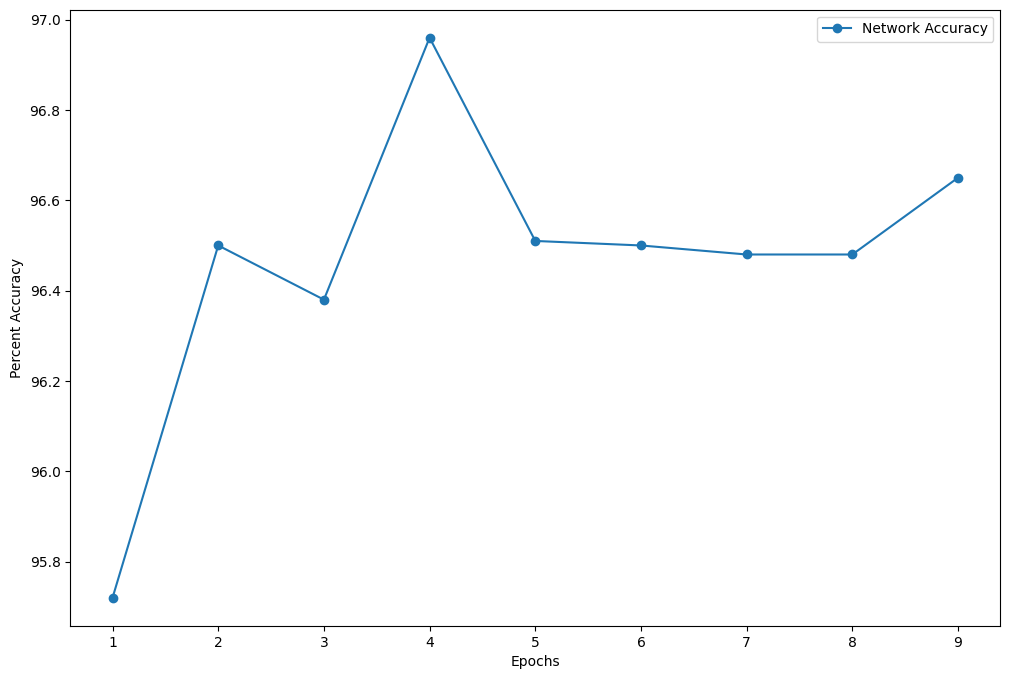

In [152]:
x_range = [i for i in range(1,10)]
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,8))
ax.plot(x_range, results, marker='o', label='Network Accuracy')

ax.set(xlabel='Epochs', ylabel='Percent Accuracy')
ax.legend()
plt.show()

In [146]:
learning_rates = [round(i * .1, 1) for i in range(1,10)]
input_nodes = 784
hidden_nodes  = 532
output_nodes = 10
lr_scores = []
for lr in learning_rates:
    n = Network(input_nodes, hidden_nodes, output_nodes, lr)
    train_network(n, train_pictures)
    scores = test_network(n, test_pictures)
    final_score = np.sum(scores) / len(scores) * 100
    lr_scores.append(final_score)

# Let's see how learning rate affects accuracy

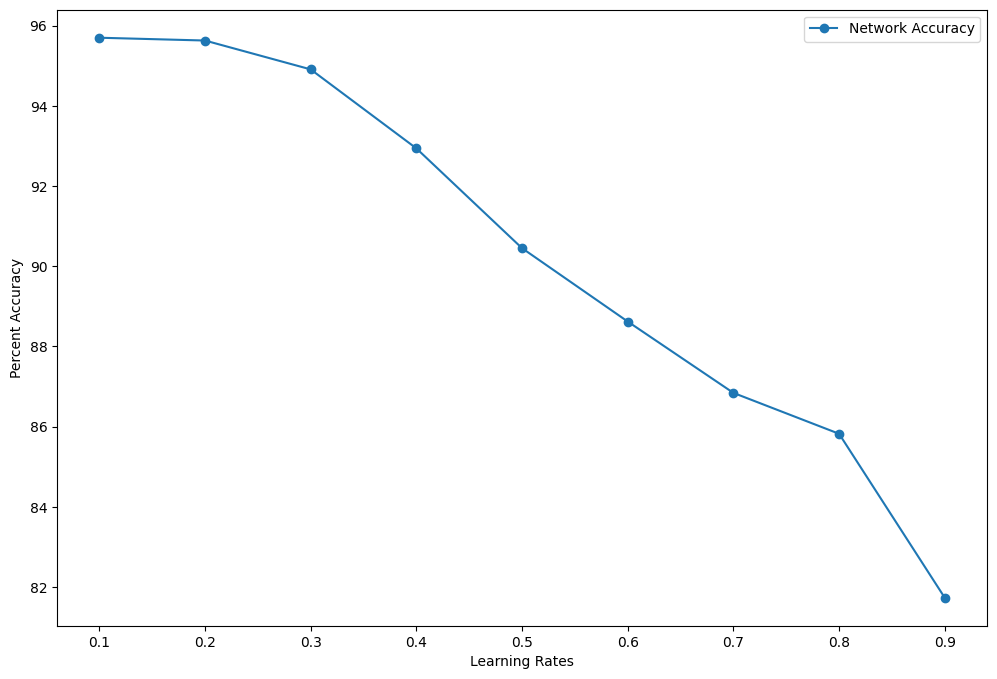

In [151]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,8))
ax.plot(learning_rates, lr_scores, marker='o', label='Network Accuracy')

ax.set(xlabel='Learning Rates', ylabel='Percent Accuracy')
ax.legend()
plt.show()

# Can the model identify one of MY handwritten digits?

In [115]:

my_five = plt.imread("mnist_data/low_res_five.png")
my_five = my_five[:,:,1].flatten()

label = 5
my_five = (my_five / 255 * .99) + .01
n.query(my_five)
np.argmax(n.query(my_five))

np.int64(5)

# It can!